In [12]:
from ema_workbench.analysis import parcoords
import pandas as pd
from ema_workbench import load_results
import seaborn as sns

sns.set(rc={'figure.figsize': (30, 14)})

In [13]:
results = load_results('/Users/felicity/PycharmProjects/MisinfoPy/results/open_exploration_indiv_DEFFUANT')
exp, out = results
# exp

In [14]:
# pd.DataFrame(out)

In [15]:
# Get unique policy names
unique_policies = exp['policy'].unique().tolist()

# Assign each unique policy a color
policy_colors = {}

for _, (policy, color) in enumerate(zip(unique_policies, sns.color_palette())):
    policy_colors[policy] = color

for k, v in policy_colors.items():
    print(k, v)

mlit_select max (0.2980392156862745, 0.4470588235294118, 0.6901960784313725)
del_t max (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)
rank_punish max (0.3333333333333333, 0.6588235294117647, 0.40784313725490196)
rank_t max (0.7686274509803922, 0.3058823529411765, 0.3215686274509804)
double rank max (0.5058823529411764, 0.4470588235294118, 0.7019607843137254)
strikes_t max (0.5764705882352941, 0.47058823529411764, 0.3764705882352941)


In [16]:
# Set limits to be comparable across Belief Update functions
_, deffuant_out = load_results(
    '/Users/felicity/PycharmProjects/MisinfoPy/results/open_exploration_indiv_DEFFUANT')
_, sample_out = load_results(
    '/Users/felicity/PycharmProjects/MisinfoPy/results/open_exploration_indiv_SAMPLE')
_, sit_out = load_results('/Users/felicity/PycharmProjects/MisinfoPy/results/open_exploration_indiv_SIT')

deffuant_out = pd.DataFrame(deffuant_out)
sample_out = pd.DataFrame(sample_out)
sit_out = pd.DataFrame(sit_out)

concat_out = pd.concat([deffuant_out, sample_out, sit_out])
limits = parcoords.get_limits(concat_out)

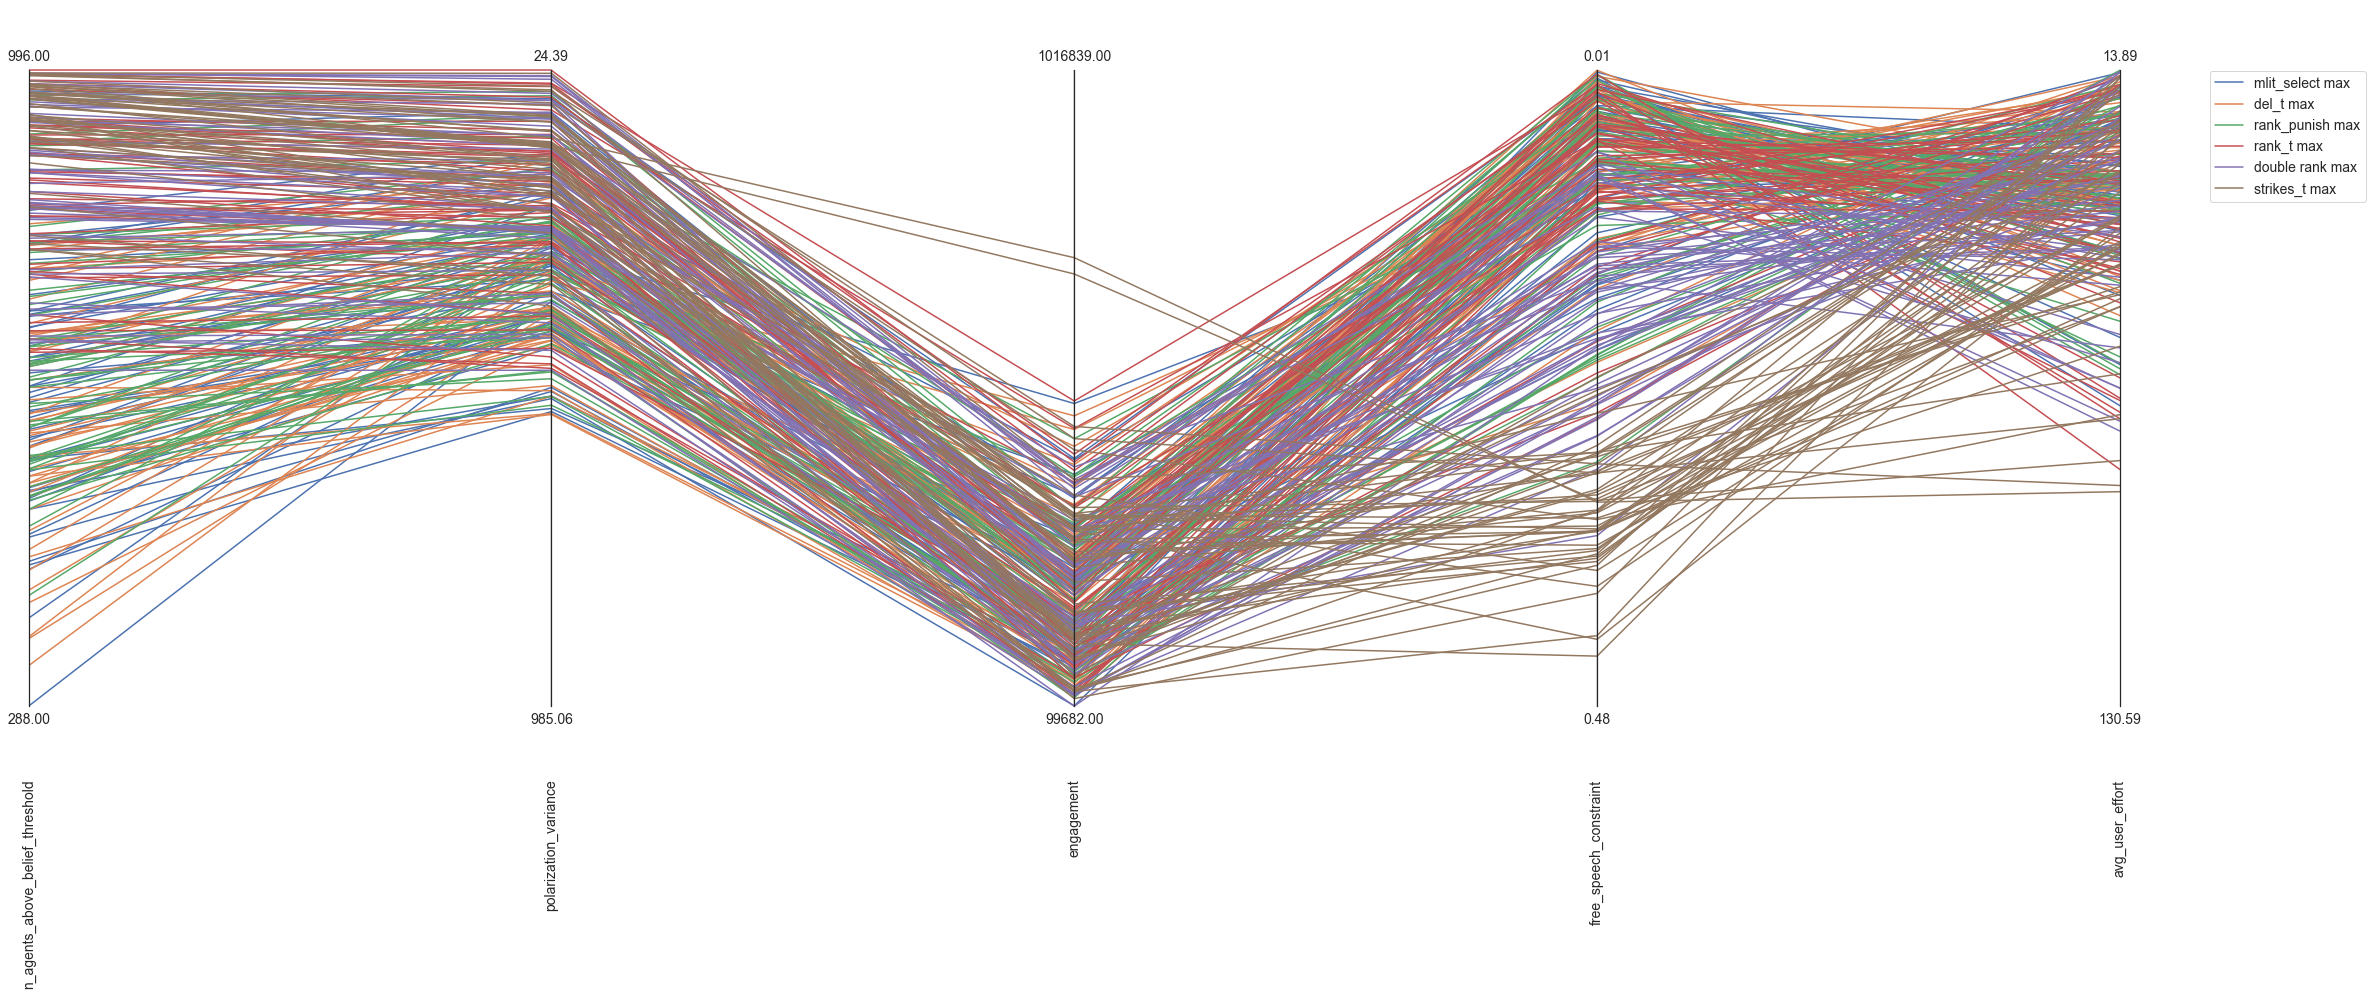

In [17]:
out = pd.DataFrame(out)
axes = parcoords.ParallelAxes(limits)

minimize = ['polarization_variance', 'free_speech_constraint', 'avg_user_effort']
for metric in minimize:
    axes.invert_axis(metric)

for policy, color in policy_colors.items():
    # policy_value = exp.loc[i, "policy"]
    indices = list(exp[exp['policy'] == policy].index)
    part = out.iloc[indices, :]
    axes.plot(part, color=color, label=policy)

axes.legend()